## Bayes decision rule

The best classifier os the Bayes classifier defined by:

$$h_B(x)=\mathbb{I}\{m(x)\geq 1/2\}$$

where $m(x)=\mathbb{E}(Y\mid X=x)$

\begin{theorem}

For any hypothesis $h\in\mathcal{H}$, the risks satisfy $R(h)\geq R(h_B(x))$.

\end{theorem}

\begin{proof}

\begin{align*}
R(h)-R(h_B(x)) &= \mathbb{P}(Y\not = h(X))- \mathbb{P}(Y\not = h_B(X))\\
               &= \int \mathbb{P}(Y\not = h(X)\mid X=x)p(x)\mathrm{d}x - \int \mathbb{P}(Y\not = h_B(X)\mid X=x)p(x)\mathrm{d}x\\
               &= \int (\mathbb{P}(Y\not = h(X)\mid X=x)-\mathbb{P}(Y\not = h_B(X)\mid X=x))p(x)\mathrm{d}x
\end{align*}

To prove $R(h)\geq R(h_B(x))$, we need to show $\mathbb{P}(Y\not = h(X)\mid X=x)-\mathbb{P}(Y\not = h_B(X)\mid X=x)\geq 0$

\begin{align*}
\mathbb{P}(Y\not = h(X)\mid X=x)-\mathbb{P}(Y\not = h_B(X)\mid X=x) &=\bigg(h(x)\mathbb{P}(Y\not = 1\mid X=x)+(1-h(x))\mathbb{P}(Y\not = 0\mid X=x)\bigg)\\
 -& \bigg(h_B(x)\mathbb{P}(Y\not = 1\mid X=x)+(1-h_B(x))\mathbb{P}(Y\not = 0\mid X=x)\bigg)\\
 &= h(x)(1-m(x))+(1-h(x))m(x)-\big(h_B(x)(1-m(x))+(1-h_B(x))m(x)\big)\\
 &= 2\big(m(x)-1/2\big)\big(h_B(x)-h(x)\big)\geq 0
\end{align*}

Hence $h_B(x)=1 \iff m(x)\geq 1/2$.
\end{proof}

## KNN algorithm

**PROCEDURE**:

**Select the class based on the majority vote in the k closest point**.

Probabilistic interpretation of KNN:

Let $V$ be the volume of the $m$-dim ball around $x$ containing the $k$ nearest neighbors for $x$.

Probability that a random point $x$ is in $V$:

$$p(x)V=\frac{K}{N}$$

where $p(x)$ is the pdf, or the average prob. assigned to point $x$. $N$ is the total number of points, $K$ is the number of points which are nearest to $x$.

Probability that a random point $x$ belongs to class $i$ is in $V$: 

$$p(x\mid y=i)V=\frac{K_i}{N_i}$$

Probability that a random point belongs to class $i$:

$$p(y=i)=\frac{N_i}{N}$$

Using Bayes rule:

$$\mathbb{P}(Y=i\mid x)=\frac{p(x\mid y=i)p(y=i)}{p(x)}=\frac{K_i}{K}$$

Therefore, KNN algorithm is the approximation of the Bayes classifier, which has the minimum risk.

In [1]:
from __future__ import division
import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def k_search(dataset, labels, target, NoN):
# Try to find the nearest NoN points around target
    distance = np.sqrt(((dataset - target)**2).sum(axis = 1))
    neighbors = np.argsort(distance)[: NoN]
    neighbors_labels = labels[neighbors]
    target_label = np.argmax(np.bincount(neighbors_labels))
    return target_label

In [3]:
def Cross_Validation(sample, output, N):
# Shuffle the population
    randomize = np.arange(len(sample))
    np.random.shuffle(randomize)
    sample = sample[randomize]
    output = output[randomize]
# Divide the training sample and testing sample
    x = sample[: N]
    y = output[: N]
    x_1 = sample[N: ]
    y_1 = output[N: ]
    accuracy = []
    for j in range(1, N):
        count = 0
        for i in range(len(x_1)):
            if (k_search(x, y, x_1[i], j) == y_1[i]):
                count = count + 1
        accuracy.append(count/len(x_1))
    return accuracy

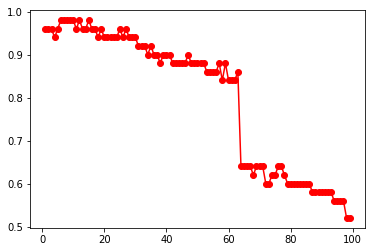

In [4]:
N = 100
data = load_iris().data
target = load_iris().target
plt.plot(range(1, N), Cross_Validation(data, target, N), 'ro-')